In [1]:

# imports
import os
import sys
import types
import json
import base64

# figure size/format
fig_width = 7
fig_height = 5
fig_format = 'retina'
fig_dpi = 96
interactivity = ''
is_shiny = False
is_dashboard = False
plotly_connected = True

# matplotlib defaults / format
try:
  import matplotlib.pyplot as plt
  plt.rcParams['figure.figsize'] = (fig_width, fig_height)
  plt.rcParams['figure.dpi'] = fig_dpi
  plt.rcParams['savefig.dpi'] = "figure"
  from IPython.display import set_matplotlib_formats
  set_matplotlib_formats(fig_format)
except Exception:
  pass

# plotly use connected mode
try:
  import plotly.io as pio
  if plotly_connected:
    pio.renderers.default = "notebook_connected"
  else:
    pio.renderers.default = "notebook"
  for template in pio.templates.keys():
    pio.templates[template].layout.margin = dict(t=30,r=0,b=0,l=0)
except Exception:
  pass

# disable itables paging for dashboards
if is_dashboard:
  try:
    from itables import options
    options.dom = 'fiBrtlp'
    options.maxBytes = 1024 * 1024
    options.language = dict(info = "Showing _TOTAL_ entries")
    options.classes = "display nowrap compact"
    options.paging = False
    options.searching = True
    options.ordering = True
    options.info = True
    options.lengthChange = False
    options.autoWidth = False
    options.responsive = True
    options.keys = True
    options.buttons = []
  except Exception:
    pass
  
  try:
    import altair as alt
    # By default, dashboards will have container sized
    # vega visualizations which allows them to flow reasonably
    theme_sentinel = '_quarto-dashboard-internal'
    def make_theme(name):
        nonTheme = alt.themes._plugins[name]    
        def patch_theme(*args, **kwargs):
            existingTheme = nonTheme()
            if 'height' not in existingTheme:
              existingTheme['height'] = 'container'
            if 'width' not in existingTheme:
              existingTheme['width'] = 'container'

            if 'config' not in existingTheme:
              existingTheme['config'] = dict()
            
            # Configure the default font sizes
            title_font_size = 15
            header_font_size = 13
            axis_font_size = 12
            legend_font_size = 12
            mark_font_size = 12
            tooltip = False

            config = existingTheme['config']

            # The Axis
            if 'axis' not in config:
              config['axis'] = dict()
            axis = config['axis']
            if 'labelFontSize' not in axis:
              axis['labelFontSize'] = axis_font_size
            if 'titleFontSize' not in axis:
              axis['titleFontSize'] = axis_font_size  

            # The legend
            if 'legend' not in config:
              config['legend'] = dict()
            legend = config['legend']
            if 'labelFontSize' not in legend:
              legend['labelFontSize'] = legend_font_size
            if 'titleFontSize' not in legend:
              legend['titleFontSize'] = legend_font_size  

            # The header
            if 'header' not in config:
              config['header'] = dict()
            header = config['header']
            if 'labelFontSize' not in header:
              header['labelFontSize'] = header_font_size
            if 'titleFontSize' not in header:
              header['titleFontSize'] = header_font_size    

            # Title
            if 'title' not in config:
              config['title'] = dict()
            title = config['title']
            if 'fontSize' not in title:
              title['fontSize'] = title_font_size

            # Marks
            if 'mark' not in config:
              config['mark'] = dict()
            mark = config['mark']
            if 'fontSize' not in mark:
              mark['fontSize'] = mark_font_size

            # Mark tooltips
            if tooltip and 'tooltip' not in mark:
              mark['tooltip'] = dict(content="encoding")

            return existingTheme
            
        return patch_theme

    # We can only do this once per session
    if theme_sentinel not in alt.themes.names():
      for name in alt.themes.names():
        alt.themes.register(name, make_theme(name))
      
      # register a sentinel theme so we only do this once
      alt.themes.register(theme_sentinel, make_theme('default'))
      alt.themes.enable('default')

  except Exception:
    pass

# enable pandas latex repr when targeting pdfs
try:
  import pandas as pd
  if fig_format == 'pdf':
    pd.set_option('display.latex.repr', True)
except Exception:
  pass

# interactivity
if interactivity:
  from IPython.core.interactiveshell import InteractiveShell
  InteractiveShell.ast_node_interactivity = interactivity

# NOTE: the kernel_deps code is repeated in the cleanup.py file
# (we can't easily share this code b/c of the way it is run).
# If you edit this code also edit the same code in cleanup.py!

# output kernel dependencies
kernel_deps = dict()
for module in list(sys.modules.values()):
  # Some modules play games with sys.modules (e.g. email/__init__.py
  # in the standard library), and occasionally this can cause strange
  # failures in getattr.  Just ignore anything that's not an ordinary
  # module.
  if not isinstance(module, types.ModuleType):
    continue
  path = getattr(module, "__file__", None)
  if not path:
    continue
  if path.endswith(".pyc") or path.endswith(".pyo"):
    path = path[:-1]
  if not os.path.exists(path):
    continue
  kernel_deps[path] = os.stat(path).st_mtime
print(json.dumps(kernel_deps))

# set run_path if requested
run_path = 'L1VzZXJzL2NoZXJ5bGtvdWFkaW8vRG9jdW1lbnRzL1JlcG9zaXRvcmllcy9wZXJzb25hbC13ZWJzaXRlLzNBL0FwcHJlbnRpc2FnZS1zdGF0'
if run_path:
  # hex-decode the path
  run_path = base64.b64decode(run_path.encode("utf-8")).decode("utf-8")
  os.chdir(run_path)

# reset state
%reset

# shiny
# Checking for shiny by using False directly because we're after the %reset. We don't want
# to set a variable that stays in global scope.
if False:
  try:
    import htmltools as _htmltools
    import ast as _ast

    _htmltools.html_dependency_render_mode = "json"

    # This decorator will be added to all function definitions
    def _display_if_has_repr_html(x):
      try:
        # IPython 7.14 preferred import
        from IPython.display import display, HTML
      except:
        from IPython.core.display import display, HTML

      if hasattr(x, '_repr_html_'):
        display(HTML(x._repr_html_()))
      return x

    # ideally we would undo the call to ast_transformers.append
    # at the end of this block whenver an error occurs, we do 
    # this for now as it will only be a problem if the user 
    # switches from shiny to not-shiny mode (and even then likely
    # won't matter)
    import builtins
    builtins._display_if_has_repr_html = _display_if_has_repr_html

    class _FunctionDefReprHtml(_ast.NodeTransformer):
      def visit_FunctionDef(self, node):
        node.decorator_list.insert(
          0,
          _ast.Name(id="_display_if_has_repr_html", ctx=_ast.Load())
        )
        return node

      def visit_AsyncFunctionDef(self, node):
        node.decorator_list.insert(
          0,
          _ast.Name(id="_display_if_has_repr_html", ctx=_ast.Load())
        )
        return node

    ip = get_ipython()
    ip.ast_transformers.append(_FunctionDefReprHtml())

  except:
    pass

def ojs_define(**kwargs):
  import json
  try:
    # IPython 7.14 preferred import
    from IPython.display import display, HTML
  except:
    from IPython.core.display import display, HTML

  # do some minor magic for convenience when handling pandas
  # dataframes
  def convert(v):
    try:
      import pandas as pd
    except ModuleNotFoundError: # don't do the magic when pandas is not available
      return v
    if type(v) == pd.Series:
      v = pd.DataFrame(v)
    if type(v) == pd.DataFrame:
      j = json.loads(v.T.to_json(orient='split'))
      return dict((k,v) for (k,v) in zip(j["index"], j["data"]))
    else:
      return v

  v = dict(contents=list(dict(name=key, value=convert(value)) for (key, value) in kwargs.items()))
  display(HTML('<script type="ojs-define">' + json.dumps(v) + '</script>'), metadata=dict(ojs_define = True))
globals()["ojs_define"] = ojs_define
globals()["__spec__"] = None

/var/folders/4g/2x7xwt6106l13nxqljfks4gm0000gn/T/ipykernel_44468/3582849597.py:25: DeprecationWarning: `set_matplotlib_formats` is deprecated since IPython 7.23, directly use `matplotlib_inline.backend_inline.set_matplotlib_formats()`
  set_matplotlib_formats(fig_format)


{"/Library/Developer/CommandLineTools/Library/Frameworks/Python3.framework/Versions/3.9/lib/python3.9/importlib/_bootstrap.py": 1731323902.0, "/Library/Developer/CommandLineTools/Library/Frameworks/Python3.framework/Versions/3.9/lib/python3.9/importlib/_bootstrap_external.py": 1731323902.0, "/Library/Developer/CommandLineTools/Library/Frameworks/Python3.framework/Versions/3.9/lib/python3.9/codecs.py": 1731323889.0, "/Library/Developer/CommandLineTools/Library/Frameworks/Python3.framework/Versions/3.9/lib/python3.9/encodings/aliases.py": 1731323904.0, "/Library/Developer/CommandLineTools/Library/Frameworks/Python3.framework/Versions/3.9/lib/python3.9/encodings/cp437.py": 1731323905.0, "/Library/Developer/CommandLineTools/Library/Frameworks/Python3.framework/Versions/3.9/lib/python3.9/encodings/__init__.py": 1731323904.0, "/Library/Developer/CommandLineTools/Library/Frameworks/Python3.framework/Versions/3.9/lib/python3.9/encodings/utf_8.py": 1731323906.0, "/Library/Developer/CommandLineT

In [2]:
import numpy as np
import pandas as pd
import math
from sklearn.feature_selection import mutual_info_regression
import matplotlib.pyplot as plt
import seaborn as sns


# Function to generate bivariate Gaussian data
def generate_bivariate_gaussian(n, rho):
    mu_X, mu_Y = np.random.normal(0, 1), np.random.normal(0, 1)
    sigma_X, sigma_Y = np.random.chisquare(1), np.random.chisquare(1)
    mean = [mu_X, mu_Y]
    cov = [[sigma_X**2, rho * sigma_X * sigma_Y], 
           [rho * sigma_X * sigma_Y, sigma_Y**2]]
    return np.random.multivariate_normal(mean, cov, size=n)

# Function to compute true mutual information
def true_mutual_information(rho):
    return -0.5 * np.log(1 - rho**2)

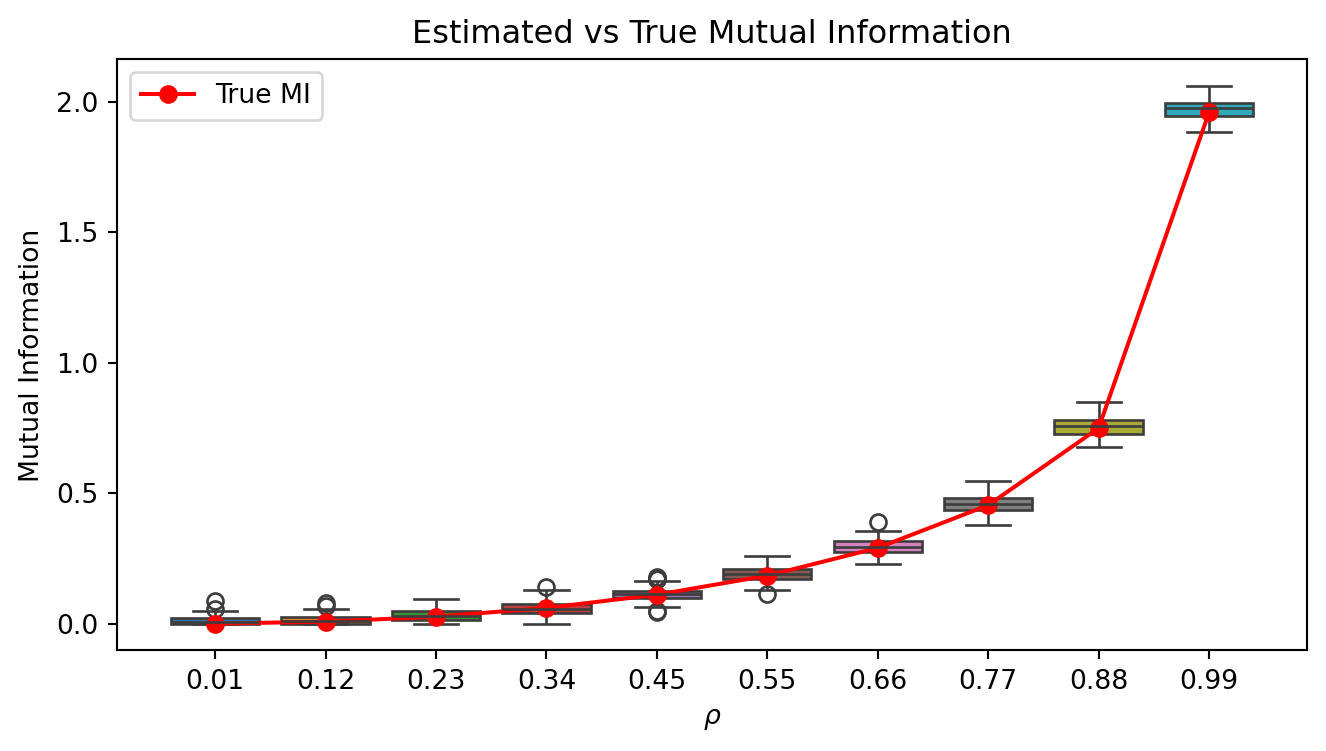

In [3]:
# Initialize parameters
n_samples = 1000
n_repeats = 100
rho_values = np.linspace(0.01, 0.99, 10)

# Store mutual information estimates
estimated_mi = []
true_mi_values = []

for rho in rho_values:
    mi_estimates = []
    for _ in range(n_repeats):
        # Generate data
        data_test = generate_bivariate_gaussian(n_samples, rho)
        X = data_test[:, 0].reshape(-1, 1)  # Feature
        Y = data_test[:, 1]  # Target
        
        # Estimate mutual information
        mi = mutual_info_regression(X, Y, discrete_features=False)
        mi_estimates.append(mi[0])  # mutual_info_regression returns an array
        
    # Store results
    estimated_mi.append(mi_estimates)
    true_mi_values.append(true_mutual_information(rho))

# Convert estimated MI to array for easy plotting
estimated_mi = np.array(estimated_mi)

# Plot boxplots of the estimated MI for each value of rho
plt.figure(figsize=(8, 4))
sns.boxplot(data=estimated_mi.T)
plt.plot(np.arange(len(rho_values)), true_mi_values, color='red', marker='o', linestyle='-', label="True MI")
plt.xticks(ticks=np.arange(len(rho_values)), labels=[f'{rho:.2f}' for rho in rho_values])
plt.xlabel(r'$\rho$')
plt.ylabel('Mutual Information')
plt.title('Estimated vs True Mutual Information')
plt.legend()
plt.show()

In [4]:
# Function to generate data
def generate_data(n):
    data = pd.DataFrame()
    for i in range(15):
        data[f"X{i+1}"] = np.random.normal(0, 1, n)
        
    for i in range(5):
        data[f"X{i+16}"] = np.random.uniform(0, 1, n)
    pi = math.pi
    data["Y"] = 2 * data["X1"] + data["X7"]**2 + data["X4"]**3 + 3 * data["X2"] * data["X11"] + \
                2 * np.sin(2 * pi * data["X19"]) + 3 * (data["X6"]**2) * np.cos(2 * pi * data["X10"])
                
    return data

In [5]:
# compute the correlation between each feature and the target
from scipy.stats import pearsonr, spearmanr

concat_spearman = []
concat_pearson = []

for sim in range(50):
    data = generate_data(500)
    spearman_corr = [spearmanr(data[col], data["Y"])[0] for col in data.columns[:-1]]
    pearson_corr = [pearsonr(data[col], data["Y"])[0] for col in data.columns[:-1]]
    concat_spearman.append(np.abs(spearman_corr))
    concat_pearson.append(np.abs(pearson_corr))

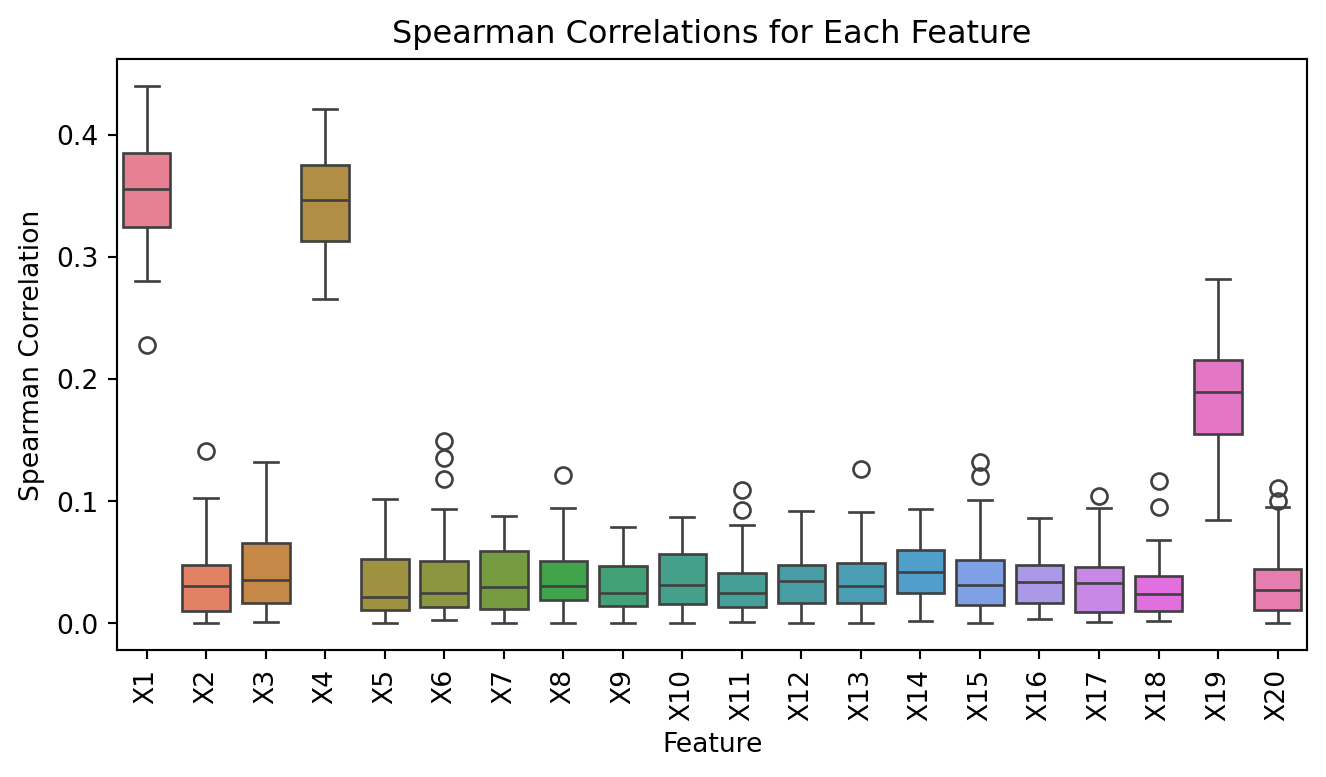

In [6]:
import pandas as pd

feature_names = data.columns[:-1]  # Get feature names from the dataset

spearman_df = pd.DataFrame(concat_spearman, columns=feature_names)
pearson_df = pd.DataFrame(concat_pearson, columns=feature_names)

# Spearman correlations
plt.figure(figsize=(8, 4))
sns.boxplot(data=spearman_df)
plt.title('Spearman Correlations for Each Feature')
plt.ylabel('Spearman Correlation')
plt.xlabel('Feature')
plt.xticks(rotation=90) 
plt.show()

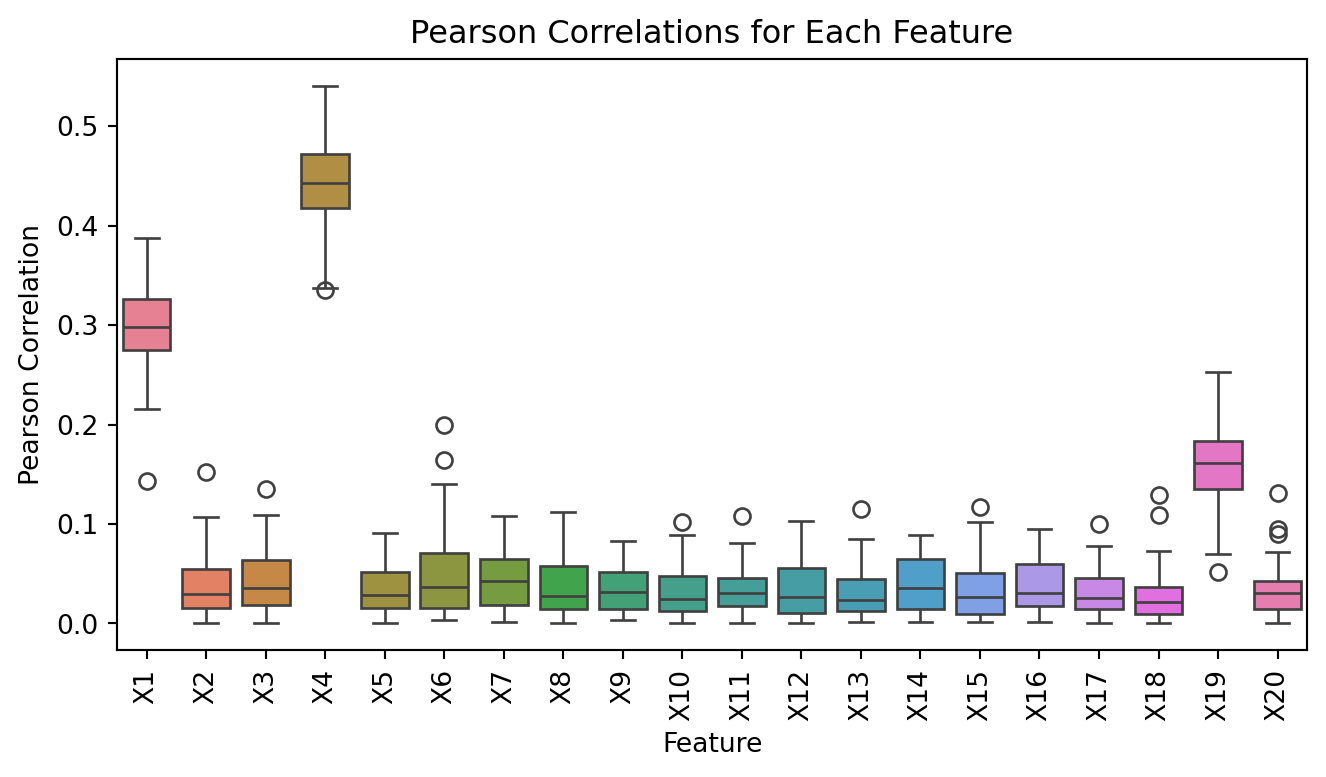

In [7]:
# Pearson correlations
plt.figure(figsize=(8, 4))
sns.boxplot(data=pearson_df)
plt.title('Pearson Correlations for Each Feature')
plt.ylabel('Pearson Correlation')
plt.xlabel('Feature')
plt.xticks(rotation=90) 
plt.show()

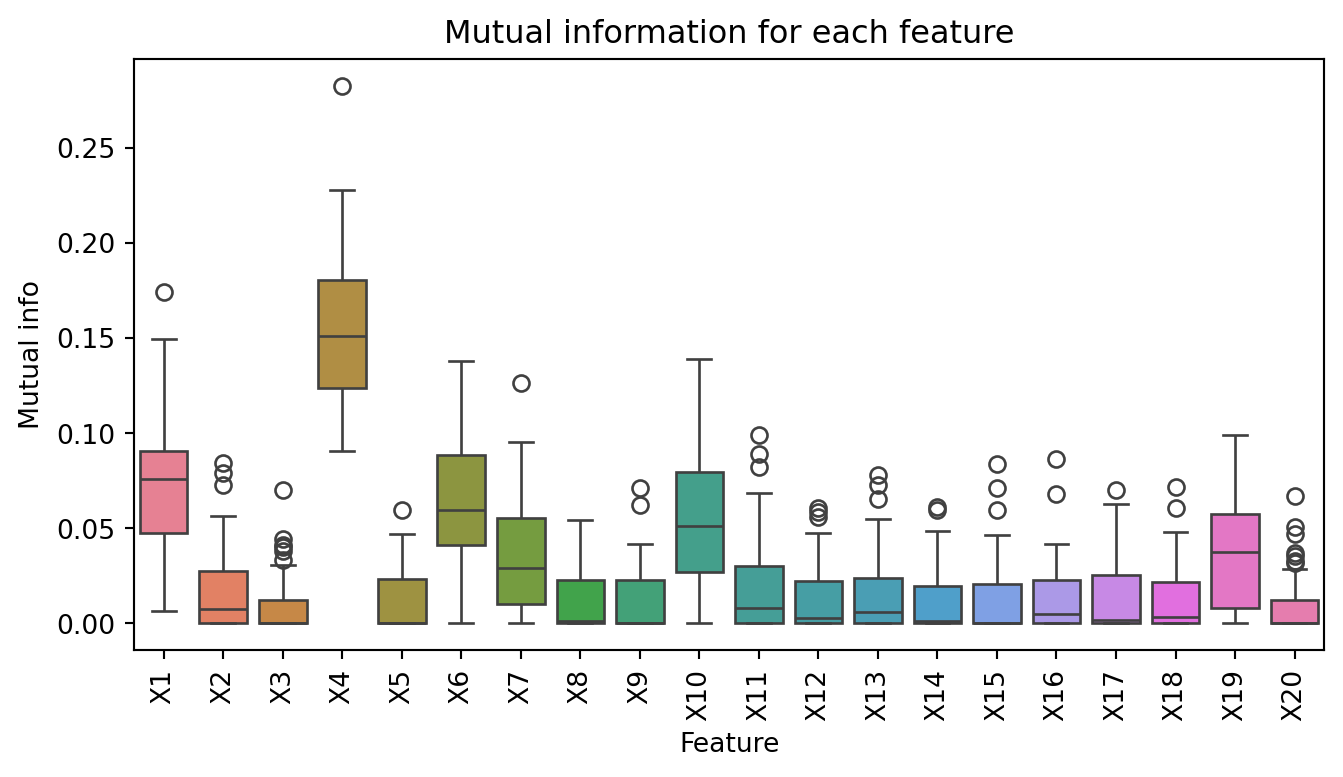

In [8]:
mutual_info = []

for sim in range(50):
    data = generate_data(500)
    mi_corr = [mutual_info_regression(data[[col]], data["Y"], discrete_features=False)[0] for col in data.columns[:-1]]
    mutual_info.append(mi_corr)

mutual_info = pd.DataFrame(mutual_info, columns=feature_names)

# Plotting boxplots for Spearman correlations
plt.figure(figsize=(8, 4))
sns.boxplot(data=mutual_info)
plt.title('Mutual information for each feature')
plt.ylabel('Mutual info')
plt.xlabel('Feature')
plt.xticks(rotation=90)  # Rotate feature names if there are many features
plt.show()

In [9]:
from sklearn.linear_model import LassoCV
import numpy as np
import pandas as pd
from sklearn.preprocessing import StandardScaler

n_simulations = 50
n_samples = 500
n_features = data.shape[1] - 1  

selected_features = np.zeros((n_simulations, n_features))
scaler = StandardScaler()
for sim in range(n_simulations):
    # Generate data
    data = generate_data(n_samples)
    X = data.drop(columns=["Y"]) 
    X_scaled = scaler.fit_transform(X)
    y = data["Y"] 
    
    lasso = LassoCV().fit(X_scaled, y)
    
    selected_features[sim, :] = (lasso.coef_ != 0).astype(int)

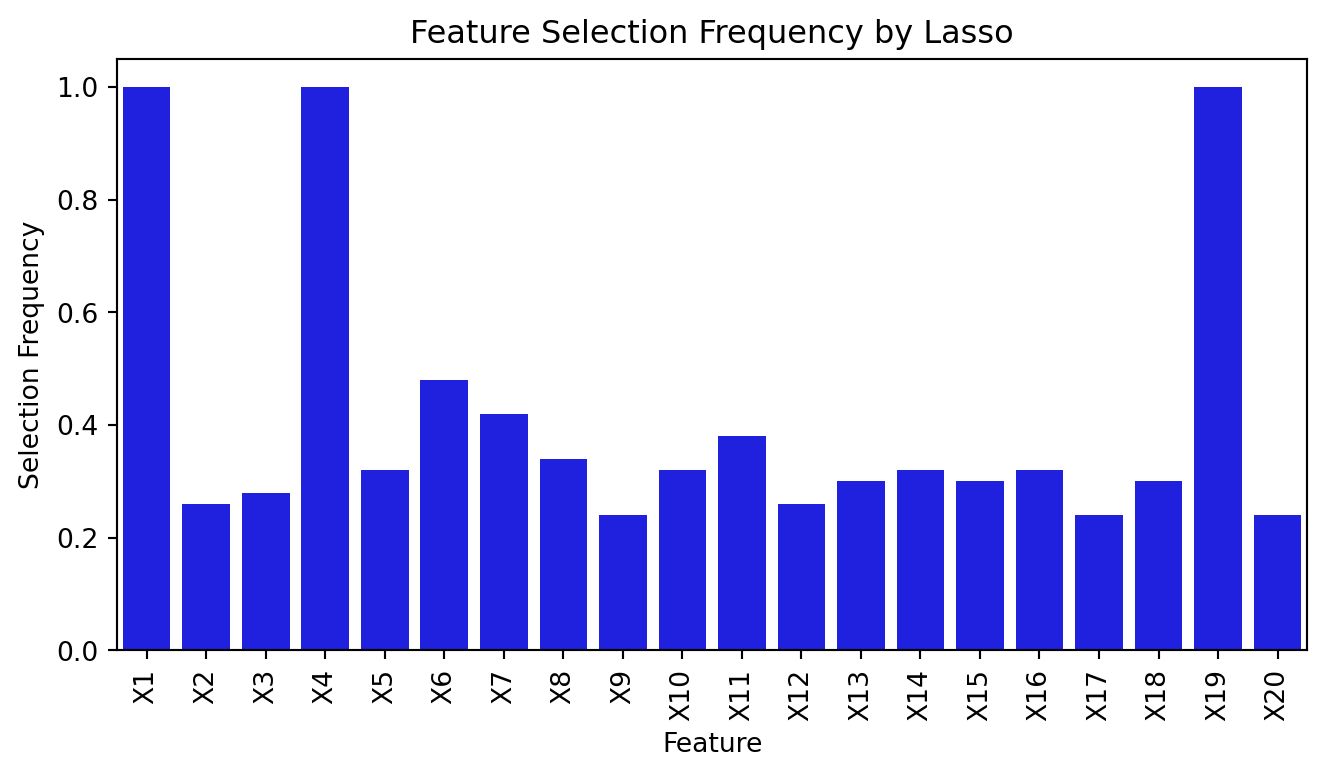

In [10]:
# Frequency of selection for each feature
selection_frequency = np.mean(selected_features, axis=0)

# Create a DataFrame for better visualization
selection_df = pd.DataFrame({
    'Feature': X.columns,
    'Selection Frequency': selection_frequency
})


# You can also visualize this with a bar plot
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(8, 4))
sns.barplot(x='Feature', y='Selection Frequency', data=selection_df,color="blue")
plt.title('Feature Selection Frequency by Lasso')
plt.xticks(rotation=90)
plt.show()

In [11]:
def sobolev_kernel(x,y):
    return 1 + (x - 0.5)*(y - 0.5) + (1/2)*( (x-y)**2 - np.abs(x-y) + 1/6)

def compute_gram_matrix(z):
    z = np.asarray(z)
    M = sobolev_kernel(z[:,None],z[None,:])
    return M

def hsic(X, Y):
    n = X.shape[0]
    H = np.eye(n) - (1 / n) * np.ones((n, n))

    # Compute Gram matrices with Sobolev kernel
    K = compute_gram_matrix(X)
    L = compute_gram_matrix(Y)

    # Calculate HSIC
    hsic_value = (1 / (n - 1) ** 2) * np.trace(K @ H @ L @ H)
    return hsic_value

In [12]:
from sklearn.preprocessing import MinMaxScaler

hsic_values = []

for sim in range(50):
    data = generate_data(500)
    scaler = MinMaxScaler()
    data_scaled = pd.DataFrame(scaler.fit_transform(data), columns=data.columns)
    hsic_var = [hsic(data_scaled[col], data_scaled["Y"]) for col in data.columns[:-1]]
    hsic_values.append(hsic_var)

hsic_df = pd.DataFrame(hsic_values, columns=feature_names)

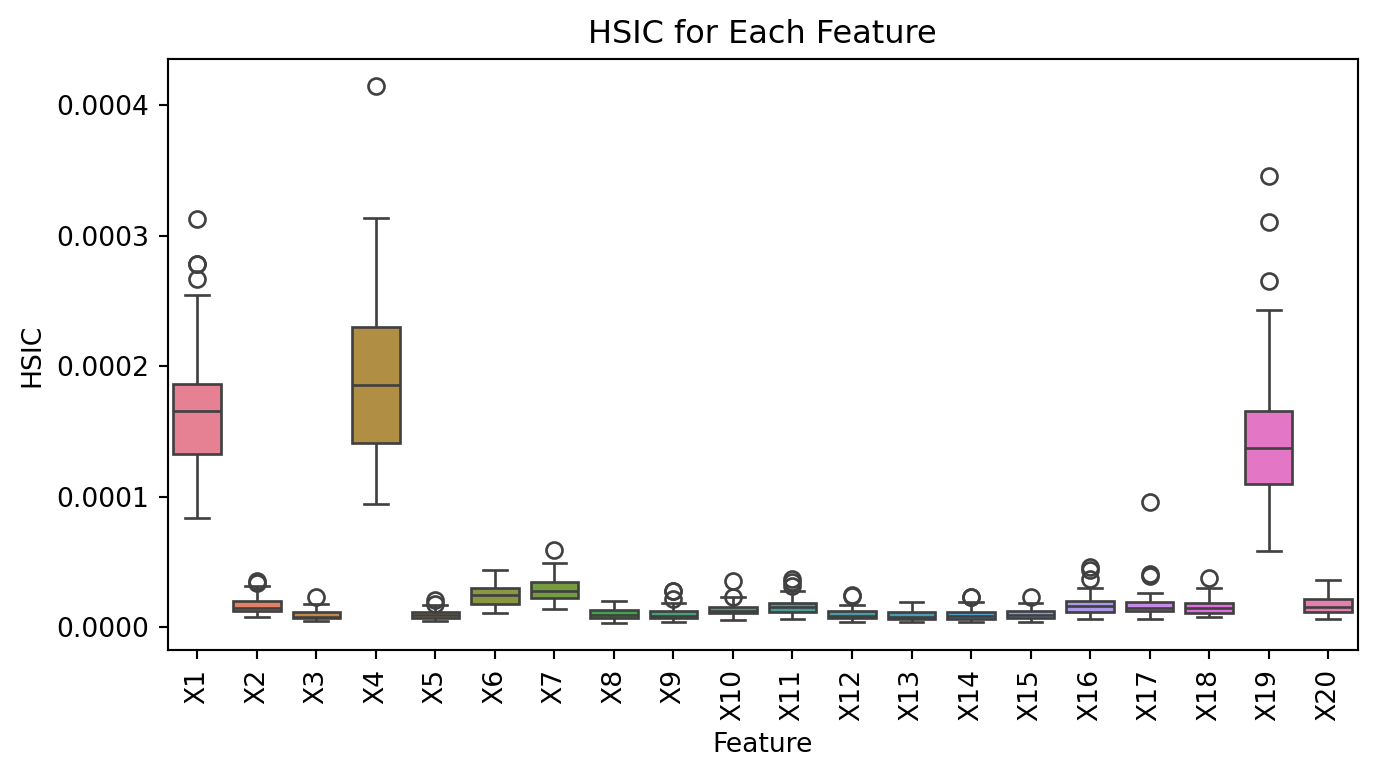

In [13]:
# Plotting boxplots for Spearman correlations
plt.figure(figsize=(8, 4))
sns.boxplot(data=hsic_df)
plt.title('HSIC for Each Feature')
plt.ylabel('HSIC')
plt.xlabel('Feature')
plt.xticks(rotation=90)  # Rotate feature names if there are many features
plt.show()

In [14]:
from sklearn.utils import resample
data = generate_data(500)

Y = data["Y"]
X = data.drop(columns=["Y"])

scaler = MinMaxScaler()
data_scaled = pd.DataFrame(scaler.fit_transform(data), columns=data.columns)
X_scaled = data_scaled.drop(columns=["Y"])
Y_scaled = data_scaled["Y"]

mi_train = mutual_info_regression(X, Y)

n_rep = 500
all_miXYindep = np.zeros((n_rep, n_features))
all_HSICindep = np.zeros((n_rep, n_features))

for rep in range(n_rep):
    # Permutation
    yb = resample(Y, replace = False)
    # Compute mutual information between all features and Y
    mi_temp = mutual_info_regression(X, np.ravel(yb))
    # Store the MI from this repetition
    all_miXYindep[rep, :] = mi_temp
    # Permutation
    yb_train = resample(Y_scaled, replace = False)


p_values_mi = np.mean(mi_train < all_miXYindep, axis=0)

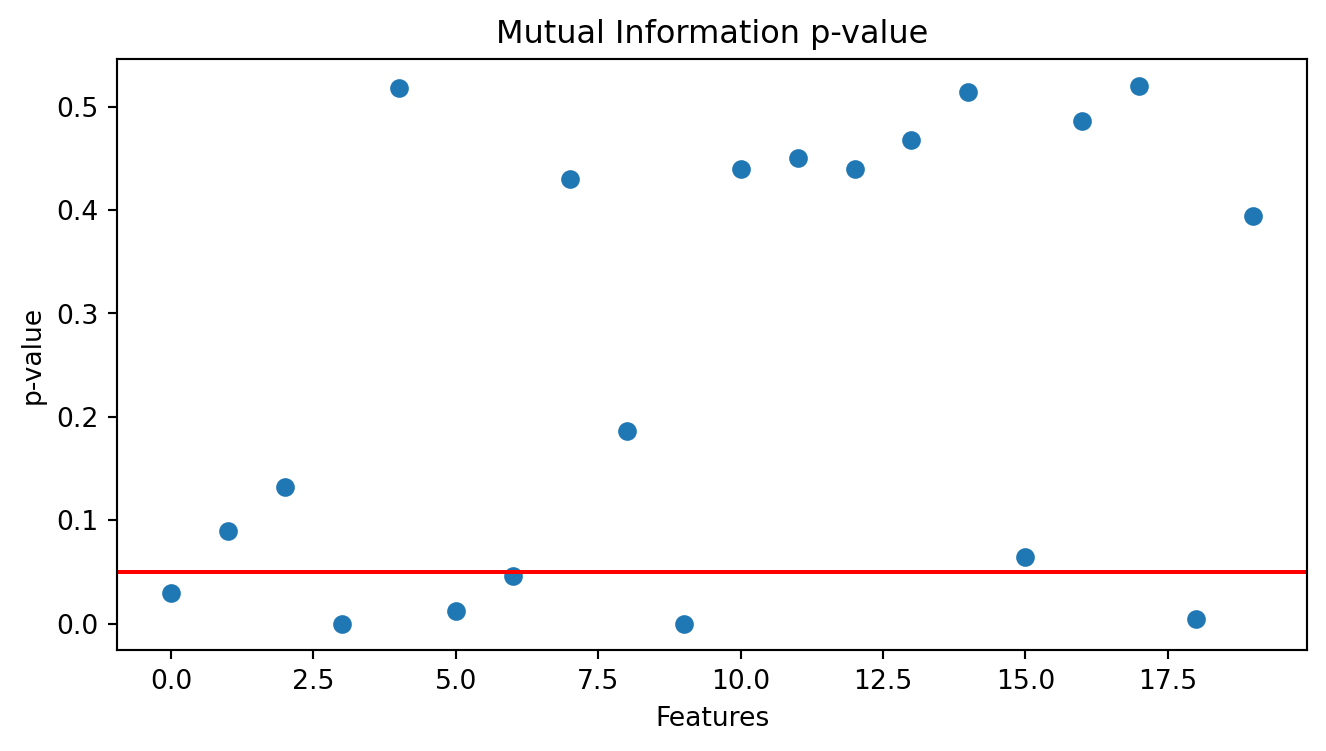

In [15]:
plt.figure(figsize=(8, 4))
plt.plot(p_values_mi, 'o')
plt.title('Mutual Information p-value')
plt.axhline(y=0.05, color='r', linestyle='-')
plt.xlabel('Features')
plt.ylabel('p-value')
plt.show()

In [16]:
print("Selected variables with MI p-values %s " % np.where(p_values_mi < 0.05))

Selected variables with MI p-values [ 0  3  5  6  9 18] 
